# Pratiques d'écoutes musicales et omnivorisme culturel
Projet Python pour la Data Science de Ribeiro Morgane et Ley Juline

### INTRODUCTION

blablabla

### SOMMAIRE 
* [Installation](#Install)

* [Préparation des données](#prepa)


## Installation <a class="anchor" id="Install"></a>



In [1]:
!pip install -r requirements.txt --quiet

#Importations
import requests
import pandas as pd
import numpy as np
import statsmodels.api as sm
from prince import MCA
from sklearn.cluster import KMeans
from plotnine import *
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import os

#Fonctions
from scripts import fonctions


## Préparation des données <a class="anchor" id="prepa"></a>

Les données utilisées sont également disponibles ici : 

Pratiques d'écoute de musique en ligne - 2020 : https://www.data.gouv.fr/datasets/pratiques-decoute-de-musique-en-ligne-2020 

Consommation des contenus culturels et sportifs numériques - Baromètre : https://www.data.gouv.fr/datasets/consommation-des-contenus-culturels-et-sportifs-numeriques-barometre


### 1. Adresses 

In [2]:
url_barometre = "https://www.data.gouv.fr/api/1/datasets/r/aff9d702-db6d-46e5-8416-c032d8b9d89d"

url_musique = "https://www.data.gouv.fr/api/1/datasets/r/85d1feb0-76cc-4e84-96f4-169971db952e"


### 2. Chargement des données

In [3]:
fonctions.telecharger(url_barometre, "data_barometre.xlsx", "/home/onyxia/work/Projet_Python_pour_DS/data")
fonctions.telecharger(url_musique, "data_musique.xlsx", "/home/onyxia/work/Projet_Python_pour_DS/data")

df_barometre_brut = pd.read_excel("/home/onyxia/work/Projet_Python_pour_DS/data/data_barometre.xlsx")
df_musique_brut = pd.read_excel("/home/onyxia/work/Projet_Python_pour_DS/data/data_musique.xlsx")


Téléchargement réussi !
Téléchargement réussi !


### 3. Structure de la base de données - Baromètre


In [4]:
fonctions.analyser(df_barometre_brut)

'La base de données contient 5002 observations et 831 variables. \nElle comprend 180 variables numériques, 651 variables de type texte, \nOn observe 3185977 valeurs manquantes, soit 76.65% de l’ensemble des cellules, \nréparties sur 736 variables. \nEnfin, 175 variables sont constantes. '

### 3. Structure de la base de données - Pratique d'écoute de musique en ligne

In [5]:
fonctions.analyser(df_musique_brut)

'La base de données contient 2200 observations et 261 variables. \nElle comprend 1 variables numériques, 260 variables de type texte, \nOn observe 214 valeurs manquantes, soit 0.04% de l’ensemble des cellules, \nréparties sur 1 variables. \nEnfin, 2 variables sont constantes. '

On se rend compte en ouvrant la base de données que la part de valeurs manquantes est bien plus élevée que 0.04%. Un recodage de deux bases de données est donc nécessaire

### 4. Recodage des données - Baromètre

Le recodage va également nous permettre de trier les variables qui nous intéressent.

In [6]:
variables_barometre = [
    "SEXE", "AGE", "AGGLOIFOP2", "TYPCOM", "TAILCOM", "DPT", "REG3", "REG13", "PI4",
    "SITI", "PPIA", "RECPPIA", "STCA", "STATUT", "FOYER", "POIDS",
    #Q1 quel produit avez-vous consommé de manière dématérialisée ces 12 derniers mois ?
    "Q1_1", "Q1_2", "Q1_3", "Q1_4", "Q1_5", "Q1_6", "Q1_7", "Q1_8", "Q1_9", "Q1_10", "Q1_11", 
    #Q2 : à quelle fréquence ?
    "Q2_r1", "Q2_r2", "Q2_r3", "Q2_r4", "Q2_r5", "Q2_r6", "Q2_r7", "Q2_r8", "Q2_r9", "Q2_r10", "Q2_r11", 
    #Q2BIS : regardez-vous des vidéos de courtes durée proposées par Youtube?
    "Q2BIS",
    #Q3 : consommation légale ? (globalité)
    "Q3",
    #Q4 : consommation légale ? globalité dans le cadre des activités proposées question1
    "Q4",
    #Q5_r : consommation légale pour chaque activité
    "Q5_r1", "Q5_r2", "Q5_r3", "Q5_r4", "Q5_r5", "Q5_r6", "Q5_r7", "Q5_r8", "Q5_r9", "Q5_r10", "Q5_r11", 
    #Q6 : fréquence de conso illégale
    "Q6_r1", "Q6_r2", "Q6_r3", "Q6_r4", "Q6_r5", "Q6_r6", "Q6_r7", "Q6_r8", "Q6_r9", "Q6_r10", "Q6_r11", 
    #QBOL14 : comment découvrez-vous de nouveaux films ?
    "QBOL14_1", "QBOL14_2", "QBOL14_3", "QBOL14_4", "QBOL14_5", "QBOL14_6", "QBOL14_7", "QBOL14_8", "QBOL14_9", 
    #QBU1 : consommation payante ou gratuite ?
    "QBU1_r1", "QBU1_r2", "QBU1_r3", "QBU1_r4", "QBU1_r5", "QBU1_r6", "QBU1_r7", "QBU1_r8", "QBU1_r9", "QBU1_r10", "QBU1_r11", 
    #QBU7 : 3 principales raisons de ne pas consommer légalement
    "QBU7_r1_c1", "QBU7_r2_c1", "QBU7_r3_c1", "QBU7_r4_c1", "QBU7_r5_c1", "QBU7_r6_c1", "QBU7_r7_c1", "QBU7_r8_c1", "QBU7_r9_c1", "QBU7_r10_c1", "QBU7_r11_c1", "QBU7_r12_c1", "QBU7_r13_c1", "QBU7_r14_c1", "QBU7_r15_c1", "QBU7_r16_c1", 
    #RS14 : quel service avez vous accès pour écouter de la musique
    "RS14_1", "RS14_2", "RS14_3", "RS14_4", "RS14_5", "RS14_6", "RS14_7", "RS14_8", "RS14_9"
]

pratiques = ["mus","films","series","photos","jv","livres","logi","presse","retrans"]

df_barometre_recode = fonctions.recodage_barometre(df_barometre_brut, variables_barometre)





   sexe  age  plusde10000habitants  commune_centreville  commune_rural  \
0     1   25                     0                    1              0   
1     0   64                     0                    0              0   
2     1   35                     0                    0              1   
3     1   65                     1                    1              0   
4     0   40                     1                    1              0   

   commune_banlieue_sup  commune_banlieue_modeste  commune_banlieue_inter  \
0                     0                         0                       0   
1                     0                         0                       1   
2                     0                         0                       0   
3                     0                         0                       0   
4                     0                         0                       0   

   commune_isolee     taille_commune  ... freq_demat_jv  freq_demat_livres  \
0             

/home/onyxia/work/Projet_Python_pour_DS/scripts/fonctions.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/onyxia/work/Projet_Python_pour_DS/scripts/fonctions.py:70: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
/home/onyxia/work/Projet_Python_pour_DS/scripts/fonctions.py:158: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


### 4. Recodage des données - Pratique d'écoute de musique en ligne

In [8]:
#df[["var_fr", "poprock", "rap", "classique", "jazz", "dance", "electro", "metal", "rnb", "soul", "reggae", "musique_monde"]] 

variables_musique = [
    "QSEXE", "RAGE2", "AGGLOIFOP2", "REG3", "REG13", "PI4", "poids",

    #A quelle fréquence utilisez-vous Internet ou des applications
    "QRS1",

    # Parmi les produits ou services culturels suivants, le(s)quel(s) avez-vous déjà personnellement consommé(s) de façon dématérialisée sur Internet , au cours des 12 derniers mois ?
    "Q1_1","Q1_2","Q1_3","Q1_4","Q1_5","Q1_6","Q1_7","Q1_8","Q1_9",

    #fréquence consommation musique / videoclip
    "Q3",

    #durée consommation musique/jour
    "Q4",

    #préférences genres musicaux
    "Q5_1", "Q5_2", "Q5_3", "Q5_4", "Q5_5", "Q5_6", "Q5_7", "Q5_8", "Q5_9", "Q5_10", "Q5_11", "Q5_12", 

    #fréquences modes d'accès 
    "Q6_r1", "Q6_r2", "Q6_r3", "Q6_r4", "Q6_r5", "Q6_r6", "Q6_r7", 

    #concerts/festivals au cours des 12 derniers mois
    "Q7",

    #appareils pour écouter musique
    "Q16_1", "Q16_2", "Q16_3", "Q16_4", "Q16_5", "Q16_6", "Q16_7", "Q16_8", "Q16_9", "Q16_10", "Q16_11", 

    #appareil le plus utilisé
    "Q17",

    #écoute moments dans la journée 
    "Q18_1", "Q18_2", "Q18_3", "Q18_4", "Q18_5", "Q18_6", "Q18_7", "Q18_8"
]

pratiques = ["mus","films","series","photos","jv","livres","logi","presse","retrans"]
mode_acces_musique = ["internet", "applications", "CD", "vinyles", "concert", "tele", "radio"]
appareils = ["ordi", "smartphone", "tablette", "tele", "console", "enceinte_intel", "enceinte_classique", "hi_fi", "autoradio", "radio", "platine"]
moments = ["reveil/dormir", "preparation", "chemin", "activités", "voiture", "travail_etude", "cuisine_menage", "amis"]

df_musique_recode = fonctions.recodage_musique(df_musique_brut, variables_musique)



   sexe  15-24  25-34  35-49  50-64  65-plus  plusde100000hab  idf  \
0     1      0      0      0      0        1                0    0   
1     1      0      0      0      1        0                1    0   
2     1      1      0      0      0        0                1    0   
3     1      0      0      1      0        0                1    0   
4     0      0      0      0      1        0                0    0   

                     region  csp_plus  ...  \
0  LanguedicRoussillonMidiP         0  ...   
1            PaysDeLaLoire1         1  ...   
2   NordPasDeCalaisPicardie         0  ...   
3    ProvenceAlpesCoteDAzur         0  ...   
4        AuvergneRhoneAlpes         0  ...   

                      utilisation_max  reveil/dormir preparation  chemin  \
0  Un poste de radio / un radioréveil              0           1       0   
1                     Une chaîne Hifi              1           1       1   
2                       Un smartphone              0           1       1  

/home/onyxia/work/Projet_Python_pour_DS/scripts/fonctions.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/onyxia/work/Projet_Python_pour_DS/scripts/fonctions.py:204: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
/home/onyxia/work/Projet_Python_pour_DS/scripts/fonctions.py:240: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
/home/onyxia/work/Projet_Python_pour_DS/scripts/fonctions.py:261: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


#### Capturer l'omnivorisme musical

Pour capturer l'omnivorisme musical, on peut essayer de récapituler les informations contenues dans plusieurs variables en une seule

Critères pour omnivorisme musical :

- Diversité dans les genres écoutés 
- Fréquence minimale
- Différents moments dans la journée
- Plusieurs types de manière d'écouter

In [ ]:

n = 3 #seuil de diversité 
df_musique_recode["diversite_genre"] = (df_musique_recode[genres].sum(axis=1) >= n).astype(int)

df_musique_recode["plusieurs_moments"] = (df_musique_recode[moments].sum(axis=1) >= n).astype(int)

df_musique_recode["plusieurs_appareils"] = (df_musique_recode[appareils].sum(axis=1) >= n).astype(int)



### 5. Statistiques descriptives - Baromètre

Une variable intéressante dans les deux bases de données que nous utilisons est "poids" qui est la pondération de chaque répondant.

In [ ]:
print("\n--- Fréquences pondérées des pratiques ---")
for p in pratiques:
    print(f"\n{p}")
    print(fonctions.ponderation_freq(df_barometre_recode[f"conso_demat_{p}"], df_barometre_recode["poids"]))


--- Fréquences pondérées des pratiques ---

mus
conso_demat_mus
0    50.000002
1    49.999998
Name: conso_demat_mus, dtype: float64

films
conso_demat_films
0    49.000005
1    50.999995
Name: conso_demat_films, dtype: float64

series
conso_demat_series
0    54.000002
1    45.999998
Name: conso_demat_series, dtype: float64

photos
conso_demat_photos
0    62.000003
1    37.999997
Name: conso_demat_photos, dtype: float64

jv
conso_demat_jv
0    64.000001
1    35.999999
Name: conso_demat_jv, dtype: float64

livres
conso_demat_livres
0    75.000001
1    24.999999
Name: conso_demat_livres, dtype: float64

logi
conso_demat_logi
0    75.000001
1    24.999999
Name: conso_demat_logi, dtype: float64

presse
conso_demat_presse
0    65.0
1    35.0
Name: conso_demat_presse, dtype: float64

retrans
conso_demat_retrans
0    83.0
1    17.0
Name: conso_demat_retrans, dtype: float64


Femme : 1 / Homme : 0

Consomme de la musique de manière dématérialisée : 1 / ne consomme pas : 0

In [ ]:
# Tableaux croisés pondérés (ex : sexe × musique)
ct = pd.pivot_table(
    df_barometre_recode,
    values="poids",
    index="sexe",
    columns="conso_demat_mus",
    aggfunc="sum",
)/5002 * 100

print("\nTableau croisé pondéré sexe × musique (%)")
print(ct)


Tableau croisé pondéré sexe × musique (%)
conso_demat_mus          0          1
sexe                                 
0                23.299399  25.700605
1                26.700603  24.299393


#### ACM sur la consommation dématérialisée 

Homogénéisation des variables de consommation en les rendant qualitatives et binaires pour réaliser une Analyse des Correspondances multiples

On cherche à explorer les relations entre les différentes pratiques et identifier des profils de consommateurs culturels

In [ ]:
pratiques = [
    "conso_demat_mus", "conso_demat_films", "conso_demat_series",
    "conso_demat_photos", "conso_demat_jv", "conso_demat_livres",
    "conso_demat_logi", "conso_demat_presse", "conso_demat_retrans"
]

for col in pratiques:
    df_barometre_recode[col + "_bin"] = np.where(df_barometre_recode[col].notna() & (df_barometre_recode[col] != 0), "Oui", "Non")


# Variables de pratiques uniquement
acm_vars = [c for c in df_barometre_recode.columns if c.endswith("_bin") or c.startswith("freq_")]
print("Variables actives ACM :", acm_vars)
print(df_barometre_recode[acm_vars].head())

mca = MCA(n_components=3,random_state=42)

mca_fit = mca.fit(df_barometre_recode[acm_vars])


Variables actives ACM : ['freq_demat_mus', 'freq_demat_films', 'freq_demat_series', 'freq_demat_photos', 'freq_demat_jv', 'freq_demat_livres', 'freq_demat_logi', 'freq_demat_presse', 'freq_demat_retrans', 'conso_demat_mus_bin', 'conso_demat_films_bin', 'conso_demat_series_bin', 'conso_demat_photos_bin', 'conso_demat_jv_bin', 'conso_demat_livres_bin', 'conso_demat_logi_bin', 'conso_demat_presse_bin', 'conso_demat_retrans_bin']
  freq_demat_mus freq_demat_films freq_demat_series freq_demat_photos  \
0            NaN              NaN               NaN               NaN   
1            NaN              NaN               NaN          Regulier   
2       Intensif         Intensif          Intensif          Regulier   
3            NaN              NaN               NaN               NaN   
4       Intensif      Occasionnel       Occasionnel               NaN   

  freq_demat_jv freq_demat_livres freq_demat_logi freq_demat_presse  \
0           NaN               NaN             NaN           

La dimension 1 représente environ 38% de l'inertie tandis que la deuxième dimension en représente 17%

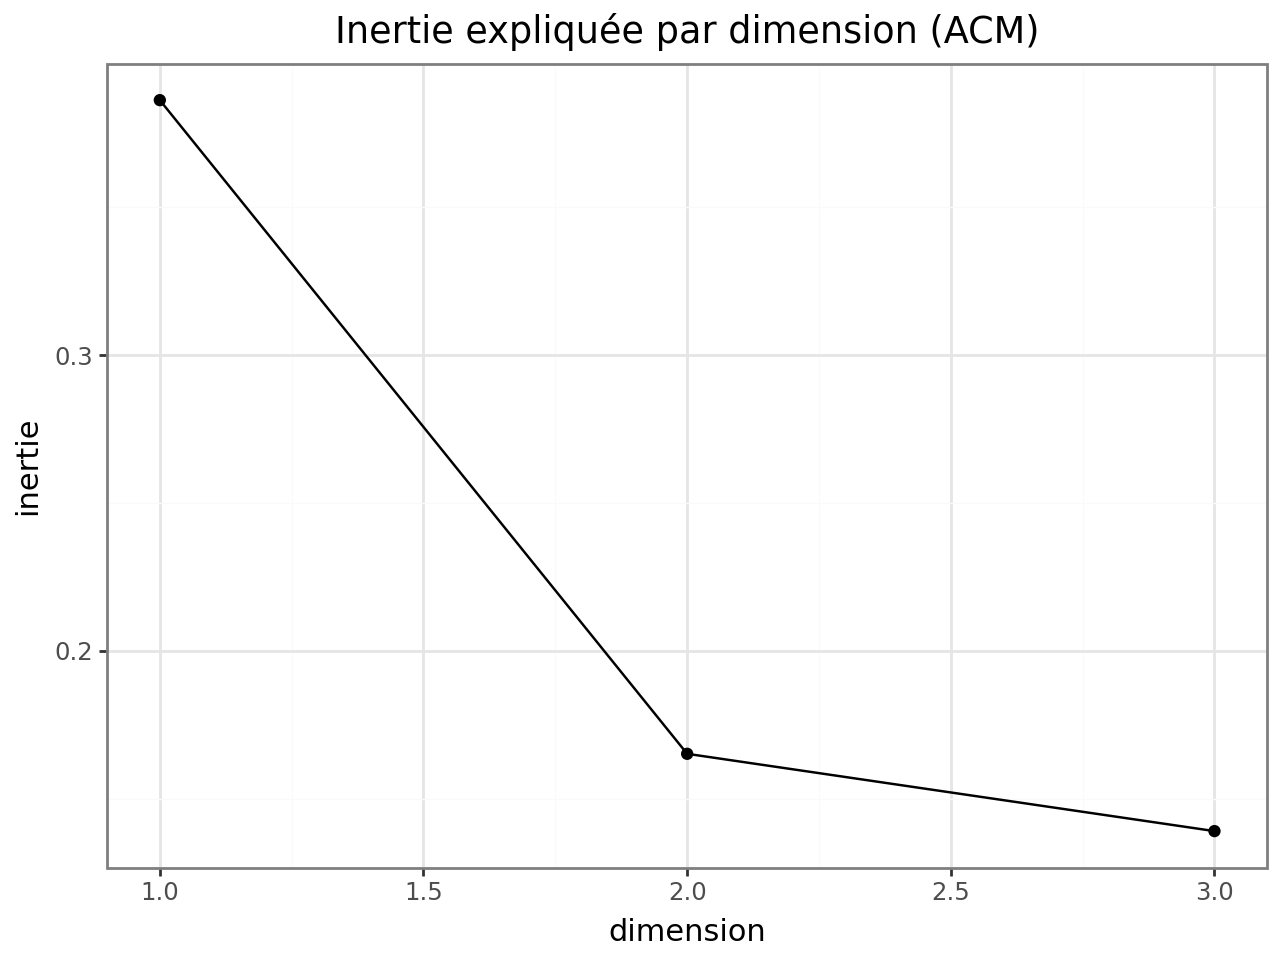

In [ ]:
# Inertie expliquée
eig = mca_fit.eigenvalues_
inertia_df = pd.DataFrame({
    "dimension": range(1, len(eig) + 1),
    "inertie": eig,
    "inertie_cumulee": np.cumsum(eig)
})

p_inertia = (
    ggplot(inertia_df, aes(x="dimension", y="inertie")) +
    geom_line() + geom_point() +
    theme_bw() +
    labs(title="Inertie expliquée par dimension (ACM)")
)

p_inertia

In [ ]:
contrib = mca.column_contributions_

contrib_12 = contrib.iloc[:, :2]
contrib_12.columns = ["Dim1", "Dim2"]

print("\nTop contributions – Dimension 1")
print(contrib_12["Dim1"].sort_values(ascending=False).head(15))

print("\nTop contributions – Dimension 2")
print(contrib_12["Dim2"].sort_values(ascending=False).head(15))


Top contributions – Dimension 1
conso_demat_films_bin__Non      0.094082
conso_demat_series_bin__Non     0.081971
conso_demat_mus_bin__Non        0.077907
conso_demat_jv_bin__Non         0.061512
conso_demat_photos_bin__Non     0.058292
conso_demat_logi_bin__Non       0.043049
conso_demat_livres_bin__Non     0.039464
conso_demat_presse_bin__Non     0.035932
conso_demat_retrans_bin__Non    0.031569
conso_demat_logi_bin__Oui       0.029867
conso_demat_jv_bin__Oui         0.029701
conso_demat_series_bin__Oui     0.028663
conso_demat_films_bin__Oui      0.028106
conso_demat_retrans_bin__Oui    0.027562
freq_demat_mus__Intensif        0.025736
Name: Dim1, dtype: float64

Top contributions – Dimension 2
freq_demat_films__Intensif       0.089902
freq_demat_jv__Intensif          0.069865
freq_demat_series__Intensif      0.066470
conso_demat_presse_bin__Oui      0.046292
freq_demat_livres__Intensif      0.041146
freq_demat_retrans__Intensif     0.040123
freq_demat_films__Occasionnel    0.03879

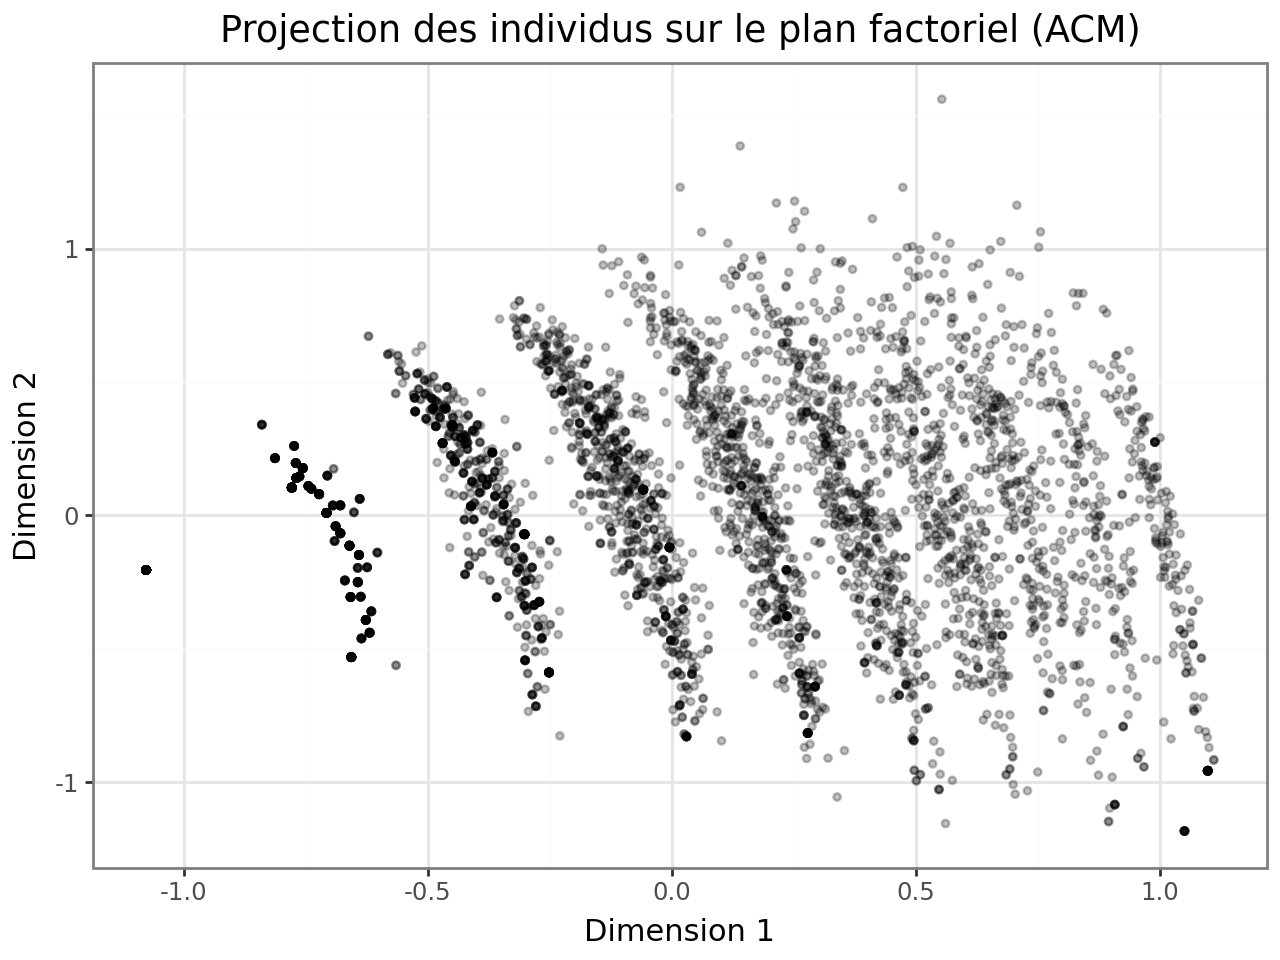

In [ ]:
# Coordonnées individuelles
coords = mca_fit.transform(df_barometre_recode[acm_vars])

ind = coords.iloc[:, :2].copy()
ind.columns = ["Dim1", "Dim2"]


p_ind = (
    ggplot(ind, aes(x="Dim1", y="Dim2")) +
    geom_point(alpha=0.25, size=1) +
    theme_bw() +
    labs(
        title="Projection des individus sur le plan factoriel (ACM)",
        x="Dimension 1",
        y="Dimension 2"
    )
)

p_ind


3 clusters
2    0.42
1    0.31
0    0.26
Name: proportion, dtype: float64

4 clusters
1    0.31
2    0.29
0    0.21
3    0.19
Name: proportion, dtype: float64

5 clusters
2    0.29
1    0.23
4    0.18
3    0.17
0    0.13
Name: proportion, dtype: float64
   k      inertia
0  2  1274.851336
1  3   834.014611
2  4   612.346485
3  5   483.631963
4  6   422.640646
5  7   357.984342
6  8   299.901520


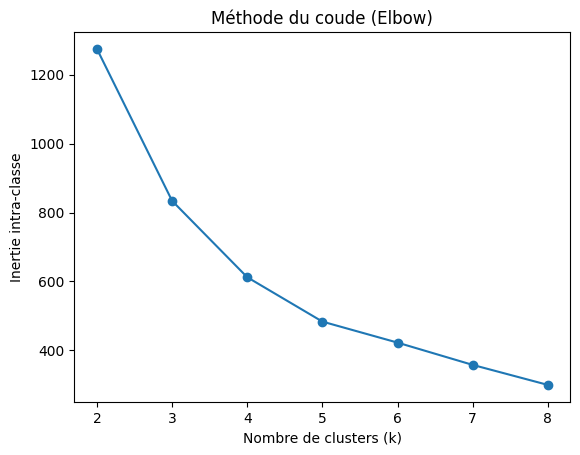

In [ ]:
X = coords.iloc[:, :2]  # Dim 1 et Dim 2 uniquement

inertia = []
K = range(2, 9)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X)
    inertia.append(km.inertia_)
    if k in [3,4,5]:
        labels = km.fit_predict(X)
        print(f"\n{k} clusters")
        print(pd.Series(labels).value_counts(normalize=True).round(2))


elbow_df = pd.DataFrame({"k": K, "inertia": inertia})
print(elbow_df)


plt.figure()
plt.plot(elbow_df["k"], elbow_df["inertia"], marker="o")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie intra-classe")
plt.title("Méthode du coude (Elbow)")
plt.show()

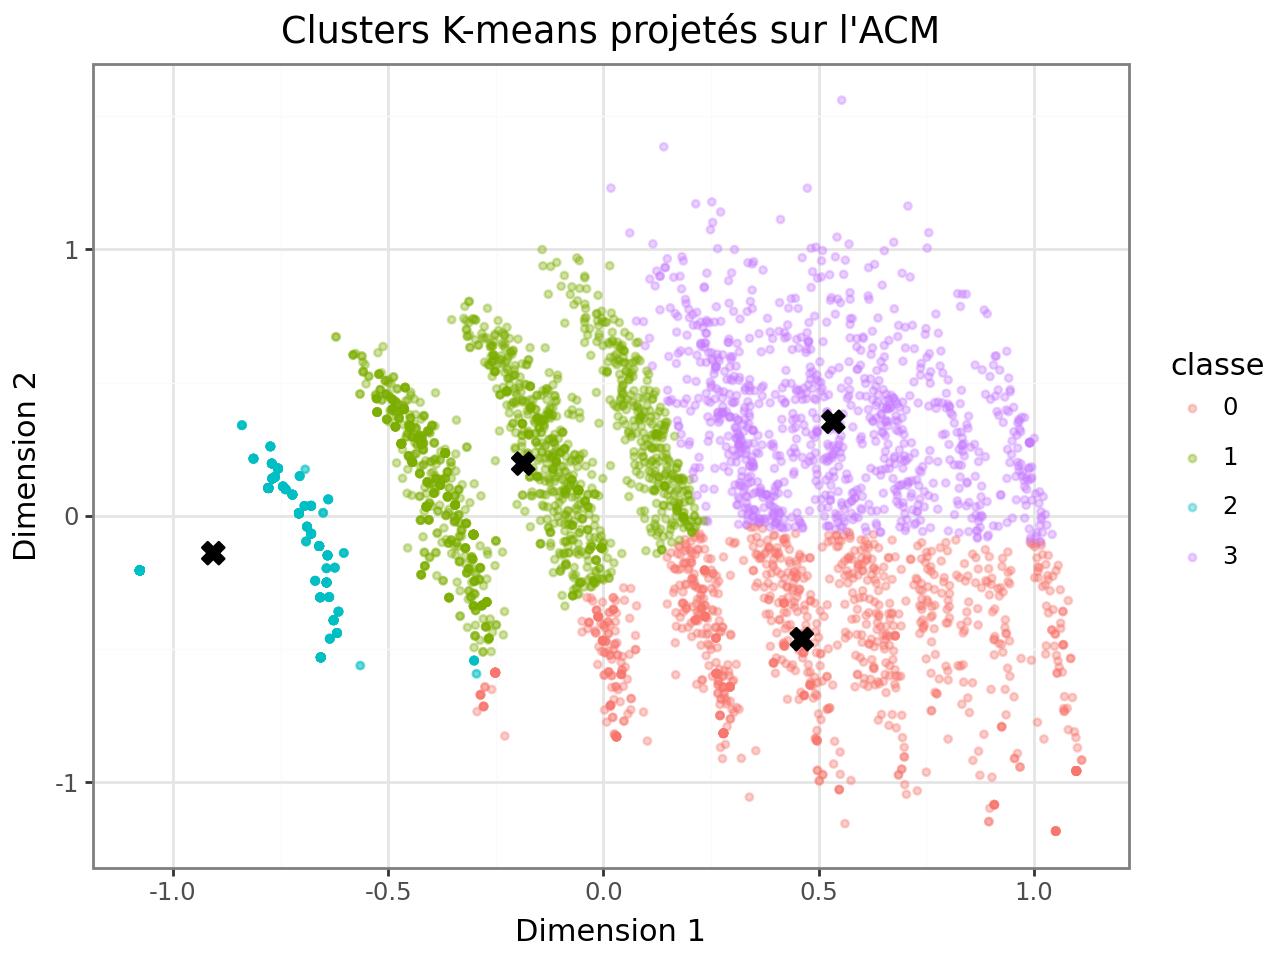

In [ ]:
X = coords.iloc[:, :2].copy()
X.columns = ["Dim_1", "Dim_2"]

kmeans = KMeans(n_clusters=4, random_state=42)
df_barometre_recode["classe"] = kmeans.fit_predict(X)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids["classe"] = centroids.index.astype("category")

plot_df = X.copy()
plot_df["classe"] = df_barometre_recode["classe"].astype("category")

p = (
    ggplot(plot_df, aes("Dim_1", "Dim_2", color="classe")) +
    geom_point(alpha=0.35, size=1) +
    geom_point(data=centroids, mapping=aes("Dim_1", "Dim_2"),
               color="black", size=4, shape="X") +
    theme_bw() +
    labs(title="Clusters K-means projetés sur l'ACM",
         x="Dimension 1", y="Dimension 2")
)

p

### ACM et CLUSTERING sur pratiques d'écoutes

In [ ]:

acm_vars_musique = (
    [col for col in df_musique_recode.columns if col in genres]
    + [col for col in df_musique_recode.columns if col.startswith("concerts_")]
)

print("Variables ACM :", acm_vars_musique)
print(df_musique_recode[acm_vars_musique].head())

# 2. Créer et ajuster la MCA
mca = MCA(n_components=3, random_state=42)
mca_fit_musique = mca.fit(df_musique_recode[acm_vars_musique])

# 3. Récupérer les coordonnées des individus et des modalités
coord_individus = mca_fit_musique.row_coordinates(df_musique_recode[acm_vars_musique])
coord_modalites = mca_fit_musique.column_coordinates(df_musique_recode[acm_vars_musique])



Variables ACM : ['var_fr', 'poprock', 'rap', 'classique', 'jazz', 'dance', 'electro', 'metal', 'rnb', 'soul', 'reggae', 'musique_monde', 'concerts_souvent', 'concerts_occasionnel', 'concerts_jamais']
   var_fr  poprock  rap  classique  jazz  dance  electro  metal  rnb  soul  \
0       1        0    0          0     1      0        0      0    0     1   
1       0        1    0          0     1      0        0      0    0     0   
2       1        1    1          0     0      0        0      0    1     0   
3       1        0    0          1     0      0        0      0    0     0   
4       1        0    0          0     1      0        0      0    0     0   

   reggae  musique_monde  concerts_souvent  concerts_occasionnel  \
0       0              0                 0                     0   
1       0              1                 1                     0   
2       0              0                 0                     1   
3       0              0                 0                 

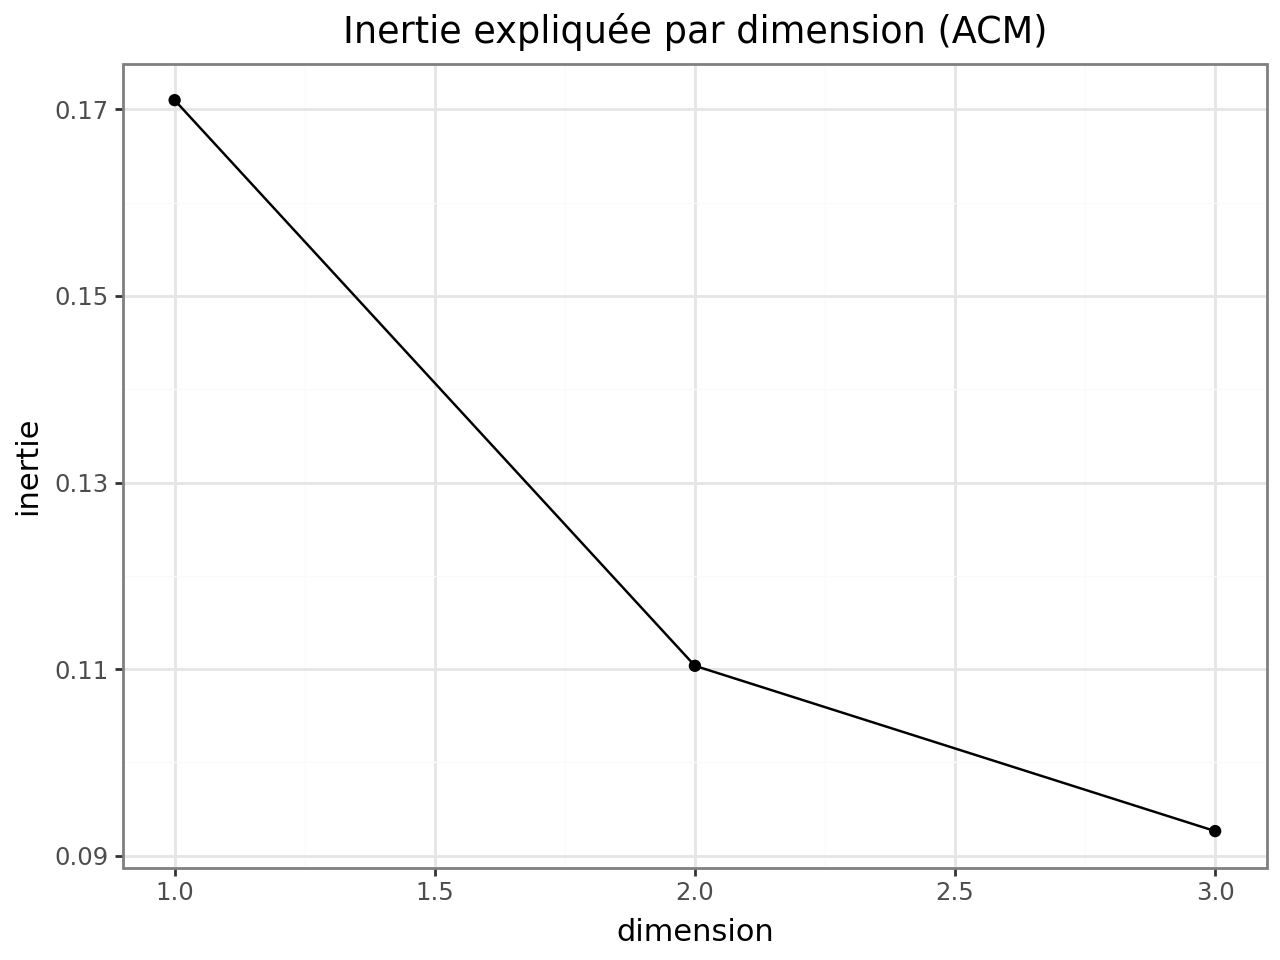

In [ ]:
# Inertie expliquée
eig_musique = mca_fit_musique.eigenvalues_
inertia_df_musique = pd.DataFrame({
    "dimension": range(1, len(eig_musique) + 1),
    "inertie": eig_musique,
    "inertie_cumulee": np.cumsum(eig_musique)
})

p_inertie_musique = (
    ggplot(inertia_df_musique, aes(x="dimension", y="inertie")) +
    geom_line() + geom_point() +
    theme_bw() +
    labs(title="Inertie expliquée par dimension (ACM)")
)

p_inertie_musique

In [ ]:
contrib_musique = mca.column_contributions_

contrib_12 = contrib_musique.iloc[:, :2]
contrib_12.columns = ["Dim1", "Dim2"]

print("\nTop contributions – Dimension 1")
print(contrib_12["Dim1"].sort_values(ascending=False).head(15))

print("\nTop contributions – Dimension 2")
print(contrib_12["Dim2"].sort_values(ascending=False).head(15))


Top contributions – Dimension 1
soul__1             0.123271
reggae__1           0.106151
dance__1            0.075987
rnb__1              0.070211
musique_monde__1    0.069855
electro__1          0.066539
jazz__1             0.056278
rap__1              0.044306
poprock__0          0.038323
poprock__1          0.037838
metal__1            0.029602
classique__1        0.028836
soul__0             0.025248
rnb__0              0.025020
dance__0            0.023225
Name: Dim1, dtype: float64

Top contributions – Dimension 2
classique__1           0.180311
rap__1                 0.173333
rnb__1                 0.140155
jazz__1                0.133166
rap__0                 0.058762
classique__0           0.054552
rnb__0                 0.049944
musique_monde__1       0.041959
dance__1               0.040026
jazz__0                0.027892
metal__1               0.013381
musique_monde__0       0.013316
dance__0               0.012234
concerts_souvent__1    0.010803
electro__1             0

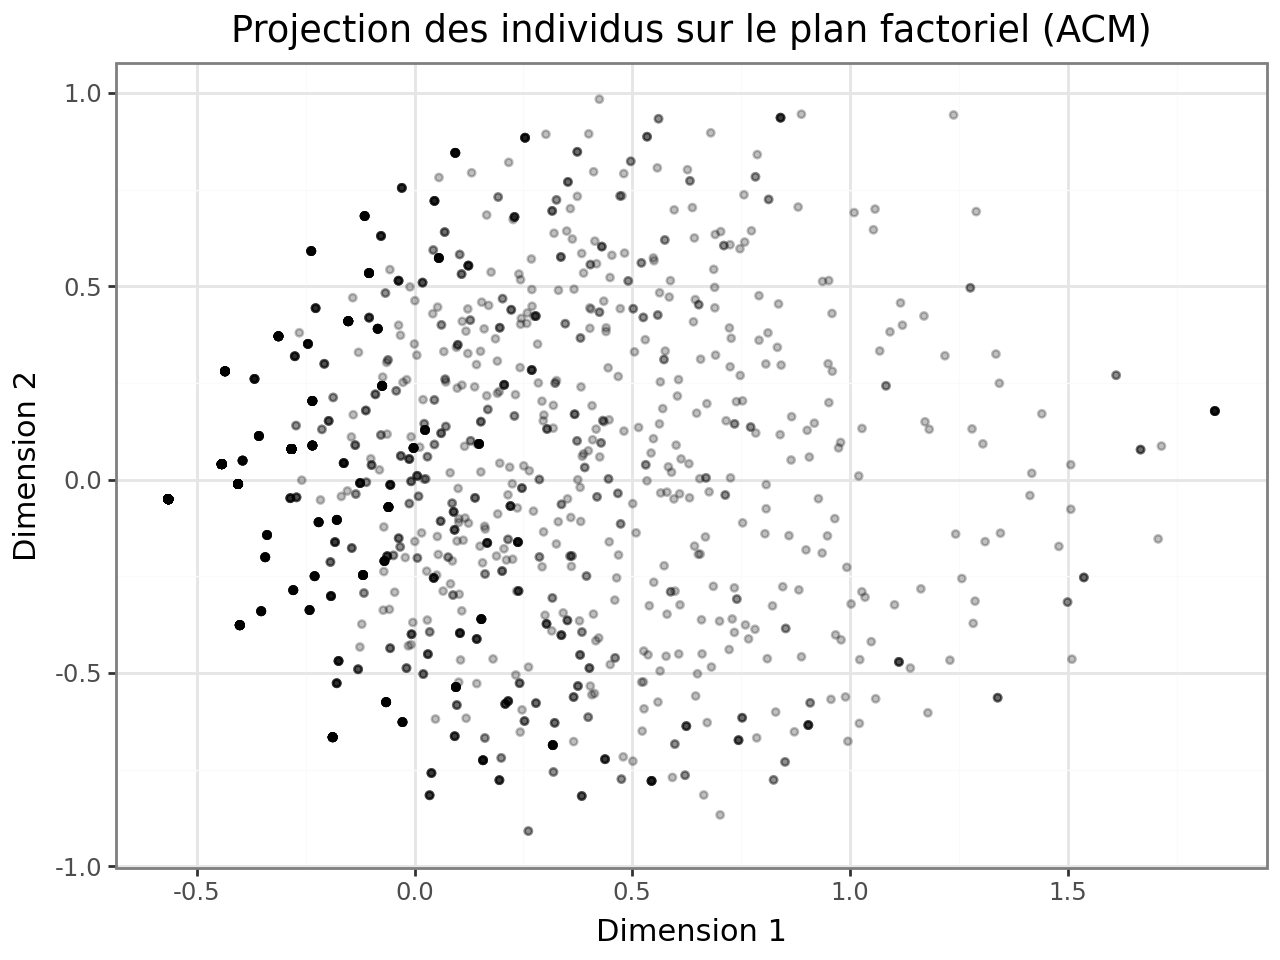

In [ ]:
# Coordonnées individuelles
coords = mca_fit_musique.transform(df_musique_recode[acm_vars_musique])

ind = coords.iloc[:, :2].copy()
ind.columns = ["Dim1", "Dim2"]


p_ind = (
    ggplot(ind, aes(x="Dim1", y="Dim2")) +
    geom_point(alpha=0.25, size=1) +
    theme_bw() +
    labs(
        title="Projection des individus sur le plan factoriel (ACM)",
        x="Dimension 1",
        y="Dimension 2"
    )
)

p_ind